In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
!pwd

/home/luca/Desktop/uni/master/lab/distributed_systems/ds/predator-prey-service/src/notebooks


In [162]:
coordinates_path = "../main/resources/experiment_data/positions_2.csv"

In [163]:
df_coordinates = pd.read_csv(coordinates_path)
df_coordinates.head()

,Unnamed: 0,elapsed_time,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,...,x_6,y_6,x_7,y_7,x_8,y_8,x_9,y_9,x_10,y_10
0,0,2.874264,112.180260,1.430529,16.582692,62.715014,154.729417,178.839186,109.468525,204.289480,...,212.695498,157.141194,73.695169,199.634358,236.791898,178.363791,67.377454,209.896264,187.951429,78.277680
1,1,4.913401,111.067483,2.738428,16.724986,63.694920,154.354535,177.541907,109.963982,203.064443,...,213.957011,157.544239,73.740226,199.671220,236.815351,178.429677,67.328854,210.209956,188.567878,78.591545
2,2,7.725088,112.397266,1.272151,17.999935,63.833655,153.432369,177.291381,108.796977,203.567325,...,214.524471,159.502718,73.542551,199.441843,236.967215,178.475693,67.830141,210.158274,188.959575,79.239208
3,3,9.790820,111.127335,2.227024,18.193116,65.018863,152.849127,175.375682,109.370139,201.949364,...,217.013180,160.210239,73.678824,199.552066,237.117613,178.985669,67.700505,211.694332,189.793319,79.687104
4,4,12.361384,112.115642,0.953537,19.535293,65.264222,151.346631,174.936144,107.766431,202.483093,...,217.745071,162.850934,74.010939,199.903123,237.759306,179.165745,69.159406,211.558384,190.494311,80.828897


In [164]:
len(df_coordinates)

557

In [165]:
x_coord = [col for col in df_coordinates.columns if col.startswith("x")]
y_coord = [col for col in df_coordinates.columns if col.startswith("y")]

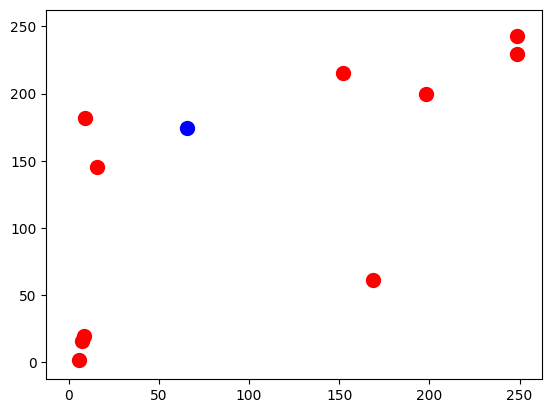

In [166]:
n = int(len(df_coordinates) * 0.90)

num_predators = 10
num_preys = 1

from celluloid import Camera

camera = Camera(plt.figure())
for i in range(len(df_coordinates)): #range(len(df_coordinates) - 200, len(df_coordinates)):
    x = df_coordinates[x_coord].loc[i]
    y = df_coordinates[y_coord].loc[i]
    
    x_pred, y_pred = x[:num_predators], y[:num_predators]
    x_prey, y_prey = x[num_predators:], y[num_predators:]
    
    plt.scatter(x_pred, y_pred, c='red', s=100, marker='o')
    plt.scatter(x_prey, y_prey, c='blue', s=100, marker='o')     
    
    camera.snap()
anim = camera.animate(blit=True)
anim.save('scatter.mp4')

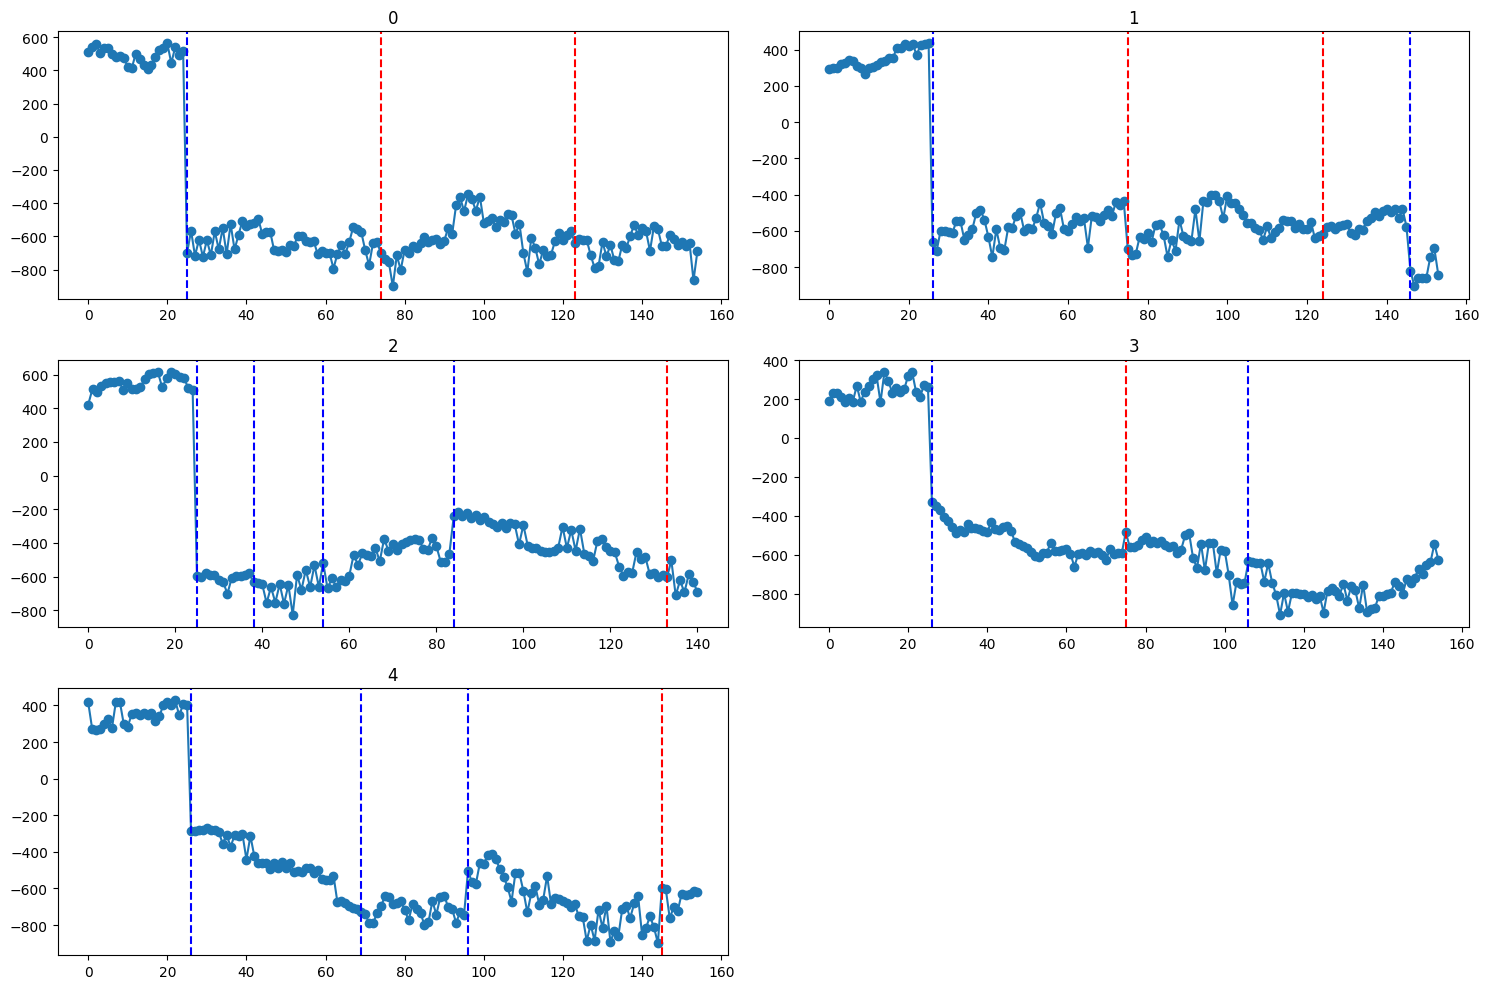

In [145]:
import numpy as np
fig, axs = plt.subplots(3, 2, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axs = axs.flatten()

for sim_id in range(5):
    rewards_path = f"../main/resources/experiment_data/rewards_{sim_id}.csv"
    df_rewards = pd.read_csv(rewards_path)
    
    et_ref = 0
    k = [(0, True)]
    for i, et in enumerate(df_rewards["elapsed_time"]):
        if et < et_ref:
            last_k = k[len(k) - 1]
            k.append((i, np.abs(i - last_k[0]) + 1 == 50))
        et_ref = et
        
    axs[sim_id].set_title(f"{sim_id}")
    axs[sim_id].plot(df_rewards["avg_rewards"], marker='o')
    for kk, f in k[1:]:
        axs[sim_id].axvline(x=kk, color='r' if f else 'b', linestyle='--')
        
# Hide the last empty subplot (if any)
axs[-1].axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()